<a href="https://colab.research.google.com/github/CharlemagneBrain/ECG_Image_Preprocessing/blob/main/Automatisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import pandas as pd
import os

In [10]:
def get_derivations(image):
    
    lead_names = [
        "lead_1", "lead_avr", "lead_v1", "lead_v4", "lead_2", "lead_avl", 
        "lead_v2", "lead_v5", "lead_3", "lead_avf", "lead_v3", "lead_v6"
      ]
    derivations = {}
    
    for i, lead_name in enumerate(lead_names):
        row = int(i/4)
        col = i%4
        derivations[lead_name] = image[row*40:(row+1)*40, col*65:(col+1)*65]
    return derivations


def get_vector(lead):

  lead_sup = lead[14:, :]
  lead_inf = lead[0:14:, :]


  lead_inf_sum_col = [ sum(x) for x in zip(*lead_inf) ]
  lead_sup_sum_col = [ sum(x) for x in zip(*lead_sup) ]

  neg_lead = [element * -1 for element in lead_inf_sum_col]
  original = np.vstack((lead_sup_sum_col, neg_lead))

  final = [ sum(x) for x in zip(*original) ]
  return final

def get_vectors(derivations):
  vectors = {}
  for name, derivation in derivations.items():
    vector = get_vector(derivation)
    vectors[name] = vector
  return vectors

def process_vectors(input_dir, output_dir):
    
    COORDINATES = [60, 180, 30, 300]
    # Liste des noms de dérivations
    lead_names = [
        "lead_1", "lead_avr", "lead_v1", "lead_v4", "lead_2", "lead_avl", 
        "lead_v2", "lead_v5", "lead_3", "lead_avf", "lead_v3", "lead_v6"
    ]
   
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file in os.listdir(input_dir):
        # Vérifie si le fichier est une image
        if file.endswith(".jpeg") or file.endswith(".jpg"):
            path = os.path.join(input_dir, file)
            ecg = cv2.imread(path)
            if ecg is None:
                print("Erreur : Image {} introuvable ou impossible à lire.".format(file))
                continue

            ecg = ecg[COORDINATES[0]:COORDINATES[1], COORDINATES[2]:COORDINATES[3]]
            gray = cv2.cvtColor(ecg, cv2.COLOR_BGR2GRAY)
            ret,th = cv2.threshold(gray,180,255,cv2.THRESH_BINARY)
           
            derivations = get_derivations(th)
            vectors = get_vectors(derivations)
            
            img_dir = os.path.join(output_dir, file)
            os.makedirs(img_dir)

            for name, vector in vectors.items():
                np.savetxt(os.path.join(img_dir, name + ".csv"), vector, delimiter=",")


In [11]:
process_vectors(input_dir="/content/drive/MyDrive/ecg_normal/", output_dir="/content/drive/MyDrive/vectors/")

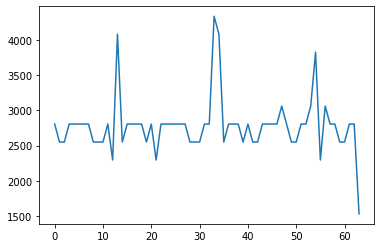

In [15]:
lead_2 = pd.read_csv("/content/drive/MyDrive/vectors/normal.jpeg/lead_2.csv")
plt.plot(lead_2);